In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_41.csv")

In [3]:
# data cleaning and indexing
df.drop("zip_code", axis=1, inplace=True)

df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

highest_offense_description family_violence  \
occurred_date_time                                                    
2003-01-01 00:00:00                  IDENTITY THEFT               N   
2003-01-01 00:01:00                  IDENTITY THEFT               N   
2003-01-01 00:01:00                  IDENTITY THEFT               N   
2003-01-01 00:01:00  AGG SEXUAL ASSAULT CHILD/OBJEC               Y   
2003-01-01 00:01:00                  IDENTITY THEFT               N   

                        report_date_time     location_type  \
occurred_date_time                                           
2003-01-01 00:00:00  2012-05-25 11:04:00  RESIDENCE / HOME   
2003-01-01 00:01:00  2015-03-12 10:17:00  RESIDENCE / HOME   
2003-01-01 00:01:00  2008-07-23 11:07:00  RESIDENCE / HOME   
2003-01-01 00:01:00  2015-07-03 08:11:00  RESIDENCE / HOME   
2003-01-01 00:01:00  2011-03-07 15:00:00  RESIDENCE / HOME   

                                 address  council_district apd_sector  \
occurred_date_time                                                      
2003-01-01 00:00:00        1105 LILY TER               3.0         HE   
2003-01-01 00:01:00     1817 E OLTORF ST               3.0         HE   
2003-01-01 00:01:00    2430 CROMWELL CIR               3.0         HE   
2003-01-01 00:01:00  6400 BLOCK LYNCH LN               3.0         HE   
2003-01-01 00:01:00       1845 BURTON DR               3.0         HE   

                     apd_district clearance_status       clearance_date  \
occurred_date_time                                                        
2003-01-01 00:00:00           3.0                N  2012-05-25 00:00:00   
2003-01-01 00:01:00           2.0                N  2015-03-12 00:00:00   
2003-01-01 00:01:00           4.0              NaN  2008-08-25 00:00:00   
2003-01-01 00:01:00           5.0                N  2016-05-31 00:00:00   
2003-01-01 00:01:00           2.0                N  2011-03-16 00:00:00   

                      latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                       
2003-01-01 00:00:00  30.234098 -97.701901  2003      1     1    1     0  
2003-01-01 00:01:00  30.231615 -97.736458  2003      1     1    1     0  
2003-01-01 00:01:00  30.226640 -97.721057  2003      1     1    1     0  
2003-01-01 00:01:00        NaN        NaN  2003      1     1    1     0  
2003-01-01 00:01:00  30.234429 -97.729699  2003      1     1    1     0

highest_offense_description family_violence  \
occurred_date_time                                                   
2020-12-11 22:17:00                    AGG ASSAULT               N   
2020-12-12 01:00:00            BURGLARY OF VEHICLE               N   
2020-12-12 08:17:00  AGG ASSAULT FAM/DATE VIOLENCE               Y   
2020-12-12 15:25:00           THEFT BY SHOPLIFTING               N   
2020-12-12 18:44:00  DISRUPTING MEETING/PROCESSION               N   

                        report_date_time                 location_type  \
occurred_date_time                                                       
2020-12-11 22:17:00  2020-12-11 22:17:00  STREETS / HWY / ROAD / ALLEY   
2020-12-12 01:00:00  2020-12-12 16:00:00  STREETS / HWY / ROAD / ALLEY   
2020-12-12 08:17:00  2020-12-12 08:17:00              RESIDENCE / HOME   
2020-12-12 15:25:00  2020-12-12 16:06:00         GROCERY / SUPERMARKET   
2020-12-12 18:44:00  2020-12-12 18:44:00  STREETS / HWY / ROAD / ALLEY   

                                           address  council_district  \
occurred_date_time                                                     
2020-12-11 22:17:00      2400 BLOCK WILLOW HILL DR               3.0   
2020-12-12 01:00:00             2501 WICKERSHAM LN               3.0   
2020-12-12 08:17:00  6934 E BEN WHITE BLVD SVRD WB               3.0   
2020-12-12 15:25:00            2505 E RIVERSIDE DR               3.0   
2020-12-12 18:44:00      1600 S PLEASANT VALLEY RD               3.0   

                    apd_sector  apd_district clearance_status  \
occurred_date_time                                              
2020-12-11 22:17:00         HE           2.0              NaN   
2020-12-12 01:00:00         HE           4.0              NaN   
2020-12-12 08:17:00         HE           5.0                C   
2020-12-12 15:25:00         HE           2.0              NaN   
2020-12-12 18:44:00         HE           2.0              NaN   

                          clearance_date   latitude  longitude  year  month  \
occurred_date_time                                                            
2020-12-11 22:17:00                  NaN  30.233321 -97.725276  2020     12   
2020-12-12 01:00:00                  NaN  30.223501 -97.725338  2020     12   
2020-12-12 08:17:00  2020-12-12 00:00:00  30.215663 -97.703550  2020     12   
2020-12-12 15:25:00                  NaN  30.234192 -97.724549  2020     12   
2020-12-12 18:44:00                  NaN  30.238012 -97.720613  2020     12   

                     week  day  hour  
occurred_date_time                    
2020-12-11 22:17:00    50   11    22  
2020-12-12 01:00:00    50   12     1  
2020-12-12 08:17:00    50   12     8  
2020-12-12 15:25:00    50   12    15  
2020-12-12 18:44:00    50   12    18

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')

# Annual overall crime (2017-present)
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime (2017-present)
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders (2017-present)
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

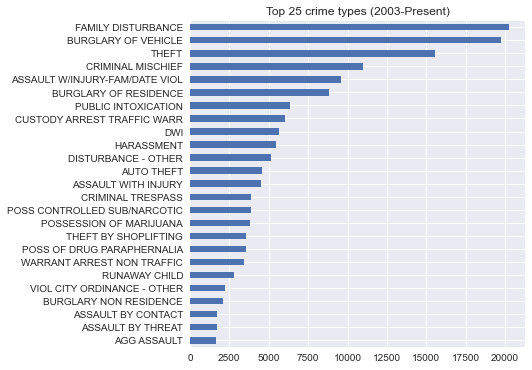

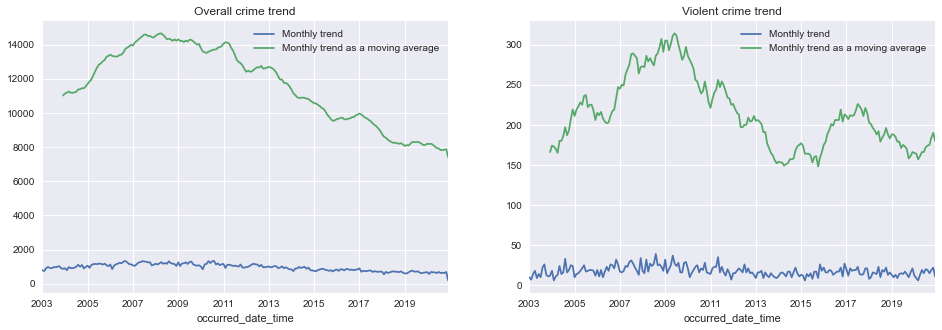

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

fig, axs = plt.subplots(ncols=2, figsize=(16, 5))
df.resample("M").size().plot(ax=axs[0])
df.resample("M").size().rolling(12).sum().plot(title="Overall crime trend", ax=axs[0])
axs[0].legend(["Monthly trend", "Monthly trend as a moving average"])
df_viol.resample("M").size().plot(ax=axs[1])
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend", ax=axs[1]
)
axs[1].legend(["Monthly trend", "Monthly trend as a moving average"])
plt.show()

Overalln crime 2017-present


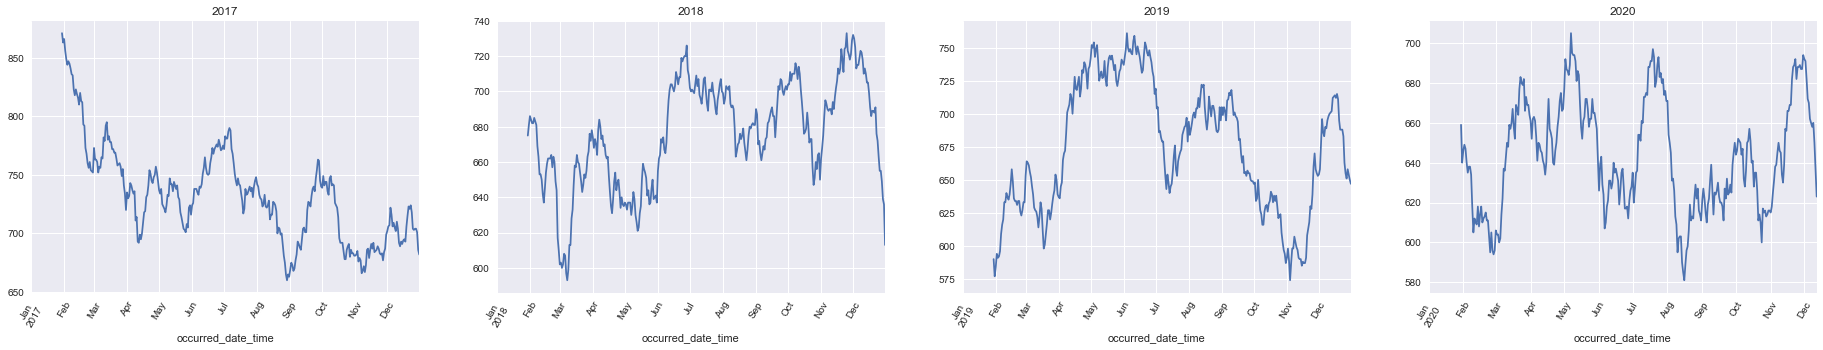

Violent crime 2017-present


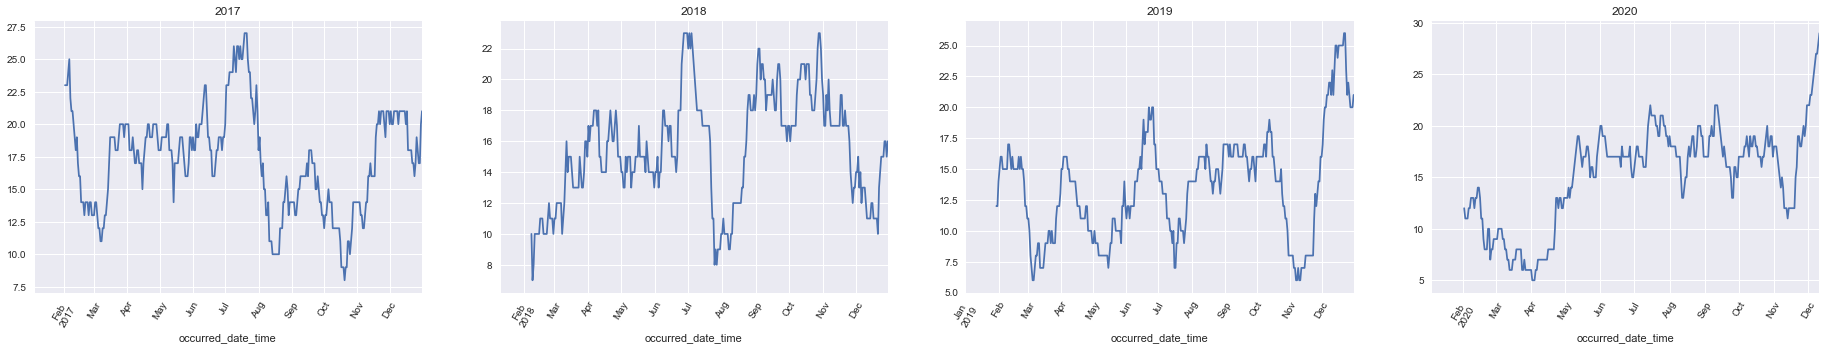

In [6]:
print("===========================")
print("Overalln crime 2017-present")
print("===========================")
fig, axs = plt.subplots(ncols=4, figsize=(32, 5))
df_17.resample("D").size().rolling(30).sum().plot(rot=60, title="2017", ax=axs[0])
df_18.resample("D").size().rolling(30).sum().plot(rot=60, title="2018", ax=axs[1])
df_19.resample("D").size().rolling(30).sum().plot(rot=60, title="2019", ax=axs[2])
df_20.resample("D").size().rolling(30).sum().plot(rot=60, title="2020", ax=axs[3])
plt.show()

print("==========================")
print("Violent crime 2017-present")
print("==========================")
fig, axs = plt.subplots(ncols=4, figsize=(32, 5))
df_viol_17.resample("D").size().rolling(30).sum().plot(rot=60, title="2017", ax=axs[0])
df_viol_18.resample("D").size().rolling(30).sum().plot(rot=60, title="2018", ax=axs[1])
df_viol_19.resample("D").size().rolling(30).sum().plot(rot=60, title="2019", ax=axs[2])
df_viol_20.resample("D").size().rolling(30).sum().plot(rot=60, title="2020", ax=axs[3])
plt.show()

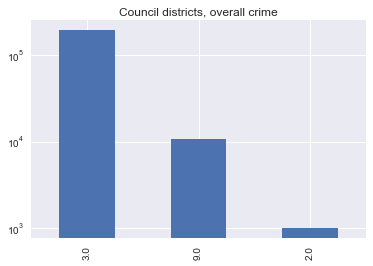

----------------------------------------------------------


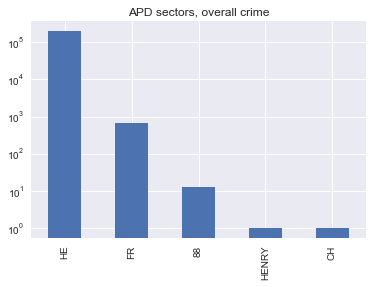

----------------------------------------------------------


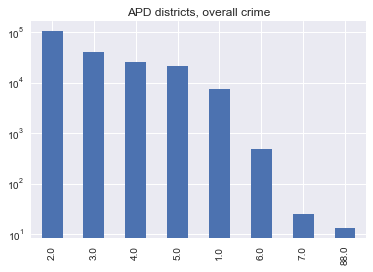

In [7]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

print("----------------------------------------------------------")

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

print("----------------------------------------------------------")

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

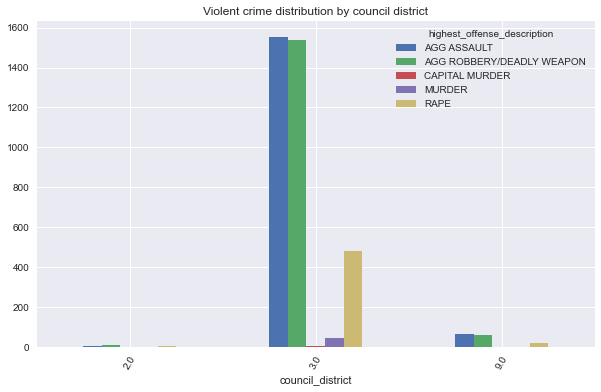

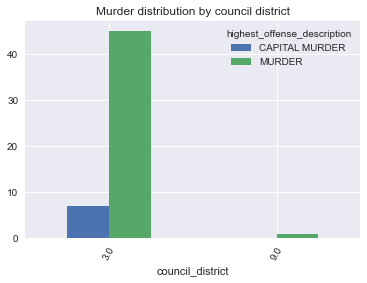

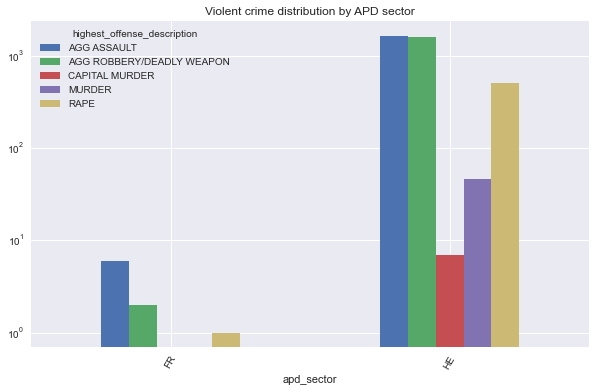

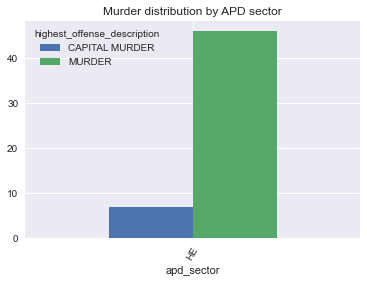

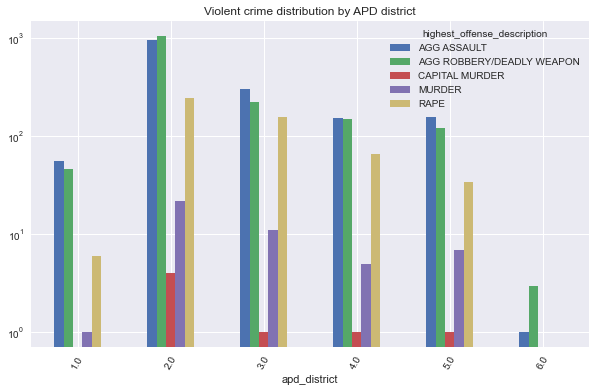

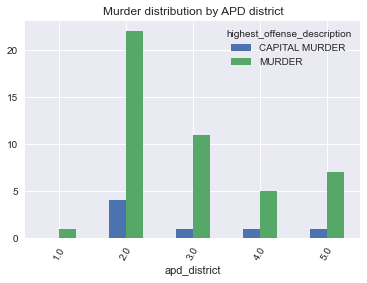

In [8]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    rot=60, figsize=(10, 6), title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    rot=60, figsize=(10, 6), logy=True, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    rot=60,
    figsize=(10, 6),
    logy=True,
    title="Violent crime distribution by APD district",
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
BANKS / SAVINGS & LOAN                                    1   
BAR / NIGHT CLUB                                         57   
CAMP / CAMPGROUND                                         0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                      0   
COMMERCIAL / OFFICE BUILDING                             20   
CONSTRUCTION SITE                                         1   
CONVENIENCE STORE                                        28   
DEPARTMENT / DISCOUNT STORE                               0   
DRUG STORE / DR. OFFICE / HOSPITAL                        0   
FIELD / WOODS                                            27   
GAS / SERVICE STATIONS                                   14   
GOVERNMENT / PUBLIC BUILDING                              4   
GROCERY / SUPERMARKET                                     8   
HOTEL / MOTEL / ETC.                                     16   
LAKE / WATERWAY                                           0   
LIQUOR STORE                                              1   
OTHER / UNKNOWN                                          40   
PARK / PLAYGROUND                                         4   
PARKING LOTS / GARAGE                                   508   
RENTAL STORAGE FACILITY                                   2   
RESIDENCE / HOME                                        500   
RESTAURANTS                                              11   
SCHOOL - ELEMENTARY / SECONDARY                           0   
SCHOOLS / COLLEGES                                        2   
SHOPPING MALL                                             0   
SPECIALTY  STORE (TV  FUR ETC.)                           1   
STREETS / HWY / ROAD / ALLEY                            384   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)           10   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
BANKS / SAVINGS & LOAN                                                  0   
BAR / NIGHT CLUB                                                       10   
CAMP / CAMPGROUND                                                       1   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                                    1   
COMMERCIAL / OFFICE BUILDING                                           68   
CONSTRUCTION SITE                                                       0   
CONVENIENCE STORE                                                      69   
DEPARTMENT / DISCOUNT STORE                                             5   
DRUG STORE / DR. OFFICE / HOSPITAL                                      3   
FIELD / WOODS                                                          12   
GAS / SERVICE STATIONS                                                 36   
GOVERNMENT / PUBLIC BUILDING                                            2   
GROCERY / SUPERMARKET                                                   4   
HOTEL / MOTEL / ETC.                                                   31   
LAKE / WATERWAY                                                         2   
LIQUOR STORE                                                            2   
OTHER / UNKNOWN                                                        25   
PARK / PLAYGROUND                                                       4   
PARKING LOTS / GARAGE                                                 628   
RENTAL STORAGE FACILITY                                                 0   
RESIDENCE / HOME                                                      295   
RESTAURANTS                                                            26   
SCHOOL - ELEMENTARY / SECONDARY                                         1   
SCHOOLS / COLLEGES                                                      0   
SHOPPING MALL                                                           3   
SPECIALTY  STORE (TV  FUR ETC.

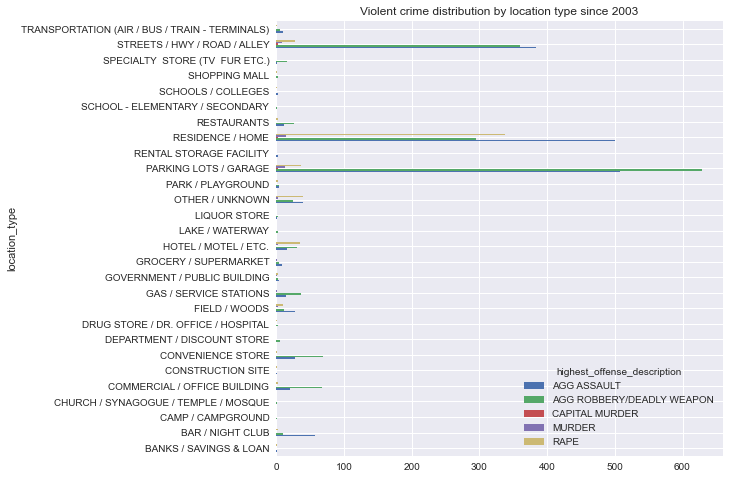

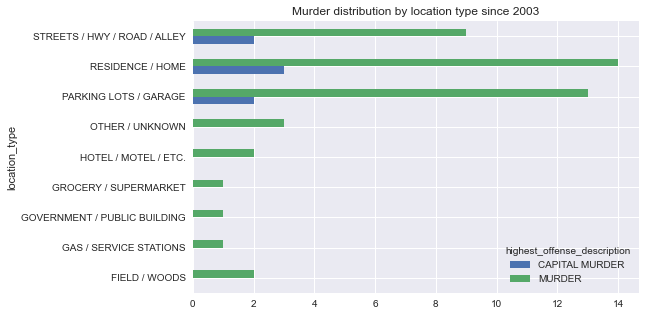

In [12]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.barh(
    figsize=(8, 8), title="Violent crime distribution by location type since 2003"
)
plt.show()

mur_loc.plot.barh(
    figsize=(8, 5), title="Murder distribution by location type since 2003"
)
plt.show()

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


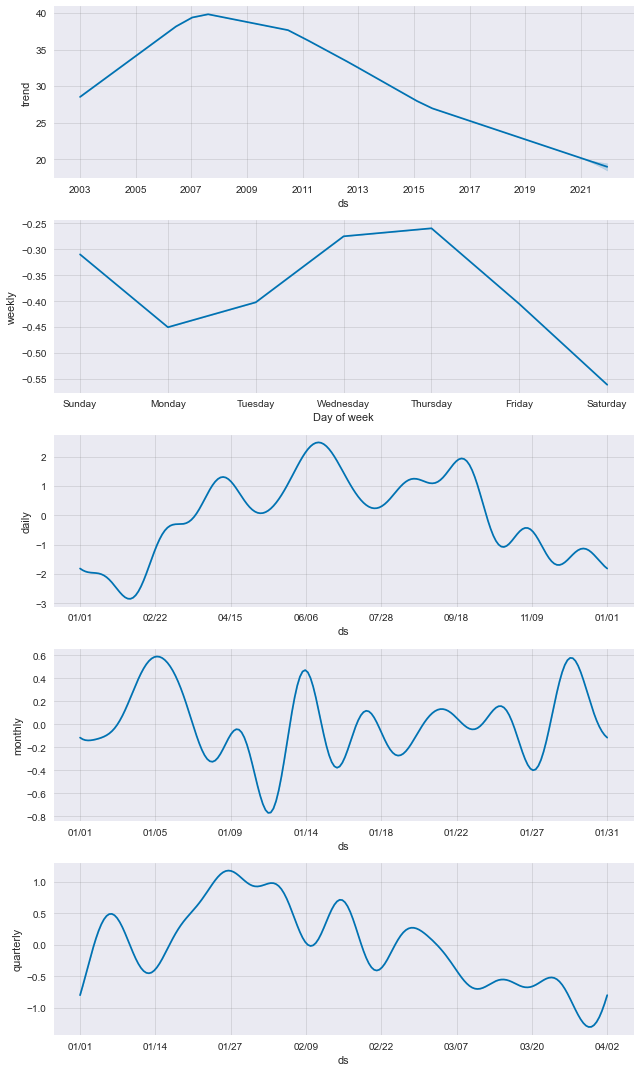

In [10]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


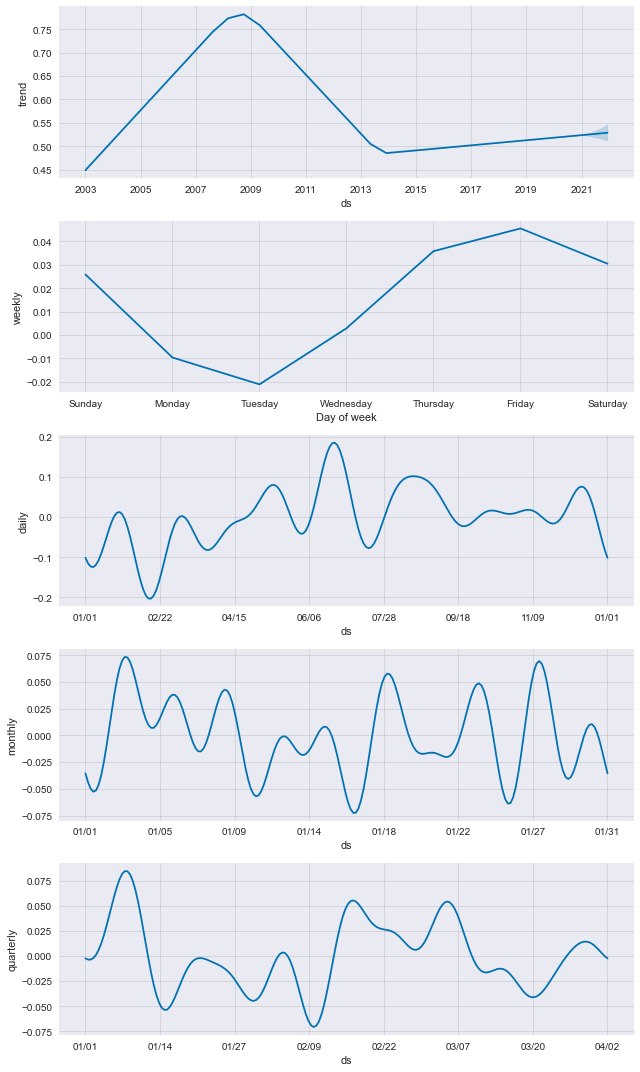

In [11]:
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
pred = n.predict(future)

fig3 = n.plot_components(pred)
fig3_1 = plot_plotly(n, pred)
fig3_1